## Linear Regression with Keras
Here we make a 'neural network' that is just a linear combination of the inputs and their weights (i.e. no activation function) trained via ADAM optimization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import tensorflow as tf

2024-06-29 10:03:06.661619: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-29 10:03:06.674913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 10:03:06.693026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 10:03:06.693050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-29 10:03:06.704220: I tensorflow/core/platform/cpu_feature_gua

In [2]:
cali = fetch_california_housing()
X = pd.DataFrame(cali['data'], columns=cali['feature_names'])
y = pd.DataFrame(cali['target'], columns=cali['target_names'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19989,1.0962,11.0,4.092652,0.929712,861.0,2.750799,36.19,-119.32
13025,3.4896,9.0,5.962060,1.143631,938.0,2.542005,38.68,-121.20
13342,3.4490,15.0,5.151515,1.052448,2373.0,2.765734,34.03,-117.65
12369,6.1437,17.0,9.252155,1.534483,1091.0,2.351293,33.78,-116.43
12248,1.8015,15.0,4.359636,1.370258,1094.0,1.660091,33.75,-117.01
...,...,...,...,...,...,...,...,...
7408,2.6179,35.0,2.969008,0.979339,2113.0,4.365702,33.96,-118.22
8996,3.2021,45.0,5.281437,1.200599,679.0,2.032934,33.99,-118.35
17816,6.8677,25.0,6.785455,0.985455,840.0,3.054545,37.40,-121.84
6946,3.6196,38.0,4.964602,0.967552,1369.0,4.038348,33.99,-118.08


In [4]:
def LinearModel(input_dim=8):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    linear = tf.keras.layers.Dense(units=1, activation=None)(input_layer)
    return tf.keras.Model(inputs=input_layer, outputs=linear)

In [5]:
lm = LinearModel()
lm.summary()

2024-06-29 10:03:08.008421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-29 10:03:08.045498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-29 10:03:08.045657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
lm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
)
loss = lm.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=30)

Epoch 1/30
  1/516 ━━━━━━━━━━━━━━━━━━━━ 3:29 406ms/step - loss: 779518.6250

I0000 00:00:1719669788.626910   58685 service.cc:145] XLA service 0x7dd1ac004ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719669788.626939   58685 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-06-29 10:03:08.638651: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-29 10:03:08.675604: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1719669788.773660   58685 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 558234.5000 - val_loss: 72629.0078
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47014.7461 - val_loss: 10435.5439
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9389.4150 - val_loss: 6494.2495
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5680.4541 - val_loss: 3944.4802
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3389.0916 - val_loss: 2047.8123
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1747.8241 - val_loss: 867.6594
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 746.3651 - val_loss: 298.6498
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 218.5283 - val_loss: 85.0329
Epoch 9/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.2769 - val_loss: 29.7037
Epoch 10/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.6200 - val_loss: 17.9858
Epoch 11/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.5842 - val_loss: 15.5953
Epoch 12/3

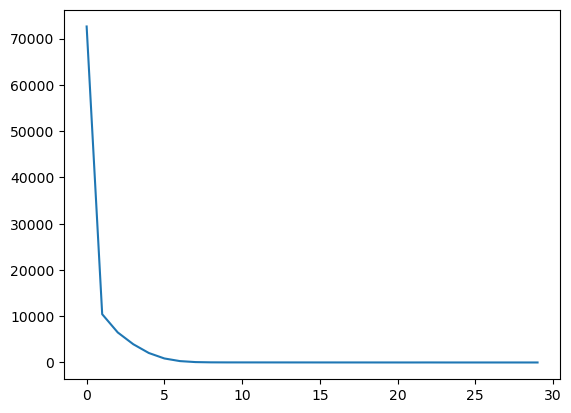

In [7]:
plt.plot(loss.history['val_loss'])

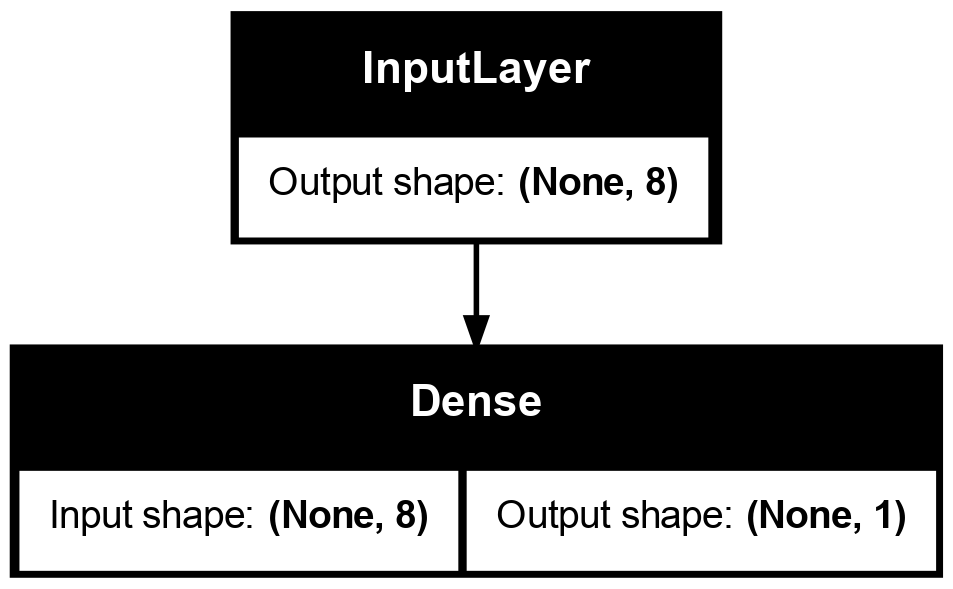

In [8]:
# Plot model
dot_img_file = 'linearModel.png'
tf.keras.utils.plot_model(lm, to_file=dot_img_file, show_shapes=True)